<a href="https://colab.research.google.com/github/merazlab/tensorflow/blob/master/mod_01/mod_01_03regreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.2


Two types of tensor object in Graph



1.   Variabel
2.   placeholder

###Variabels

* Variabels holds the value through out the session

* Variabe need to be initialized




In [0]:
sess = tf.InteractiveSession()

In [0]:
my_var = tf.Variable([2, 4, 6])
print(my_var)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32_ref>


In [0]:
sess.run(my_var) #before run ininitialize

FailedPreconditionError: ignored

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

In [0]:
sess.run(my_var) 

array([2, 4, 6], dtype=int32)

###Placeholder

* PlaceHolder are initially empty and use for feeding actual examle
* ned to devtlare expectred data types



In [0]:
my_ph = tf.placeholder(tf.float32, shape=[2, 3])
print(my_ph)

Tensor("Placeholder:0", shape=(2, 3), dtype=float32)


In [0]:
a = tf.placeholder(tf.float32, [])
b = tf.constant(1.0)
c = a + b
with tf.Session() as session:
    print(session.run(c, feed_dict={a: 3.0}))
    print(session.run(c, feed_dict={a: 5.0}))

4.0
6.0


Example

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

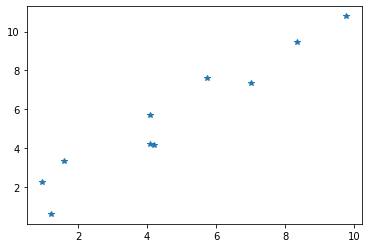

In [0]:
plt.plot(x_data,y_label,'*')

In [0]:
m = tf.Variable(0.12)
b = tf.Variable(0.3)

error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)


In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope, final_intercept = sess.run([m,b])

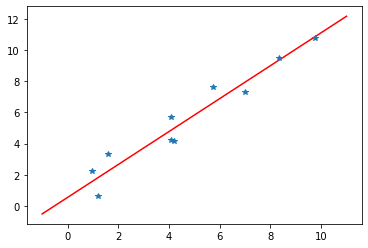

In [0]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')